In [14]:
using HarmonicBalance
@variables α, ω, ω0, F, t, η, x(t), γ # declare constant variables and a function x(t)

diff_eq = DifferentialEquation(d(x,t,2) + ω0*x + α*x^3 + 0*η*d(x,t)*x^2+ γ*d(x,t) ~ F*cos(ω*t), x)
add_harmonic!(diff_eq, x, ω) # specify the ansatz x = u(T) cos(ωt) + v(T) sin(ωt)

# implement ansatz to get harmonic equations
harmonic_eq = get_harmonic_equations(diff_eq)

fixed = (α => 1., ω0 => 1.0, F => 0.01, γ=>0.0001)   # fixed parameters
swept = ω => LinRange(0.9, 1.8, 100)              # range of parameter values
solutions = get_steady_states(harmonic_eq, swept, fixed)

A steady state result for 100 parameter points

Solution branches:   3
   of which real:    3
   of which stable:  2

Classes: stable, physical, Hopf, binary_labels


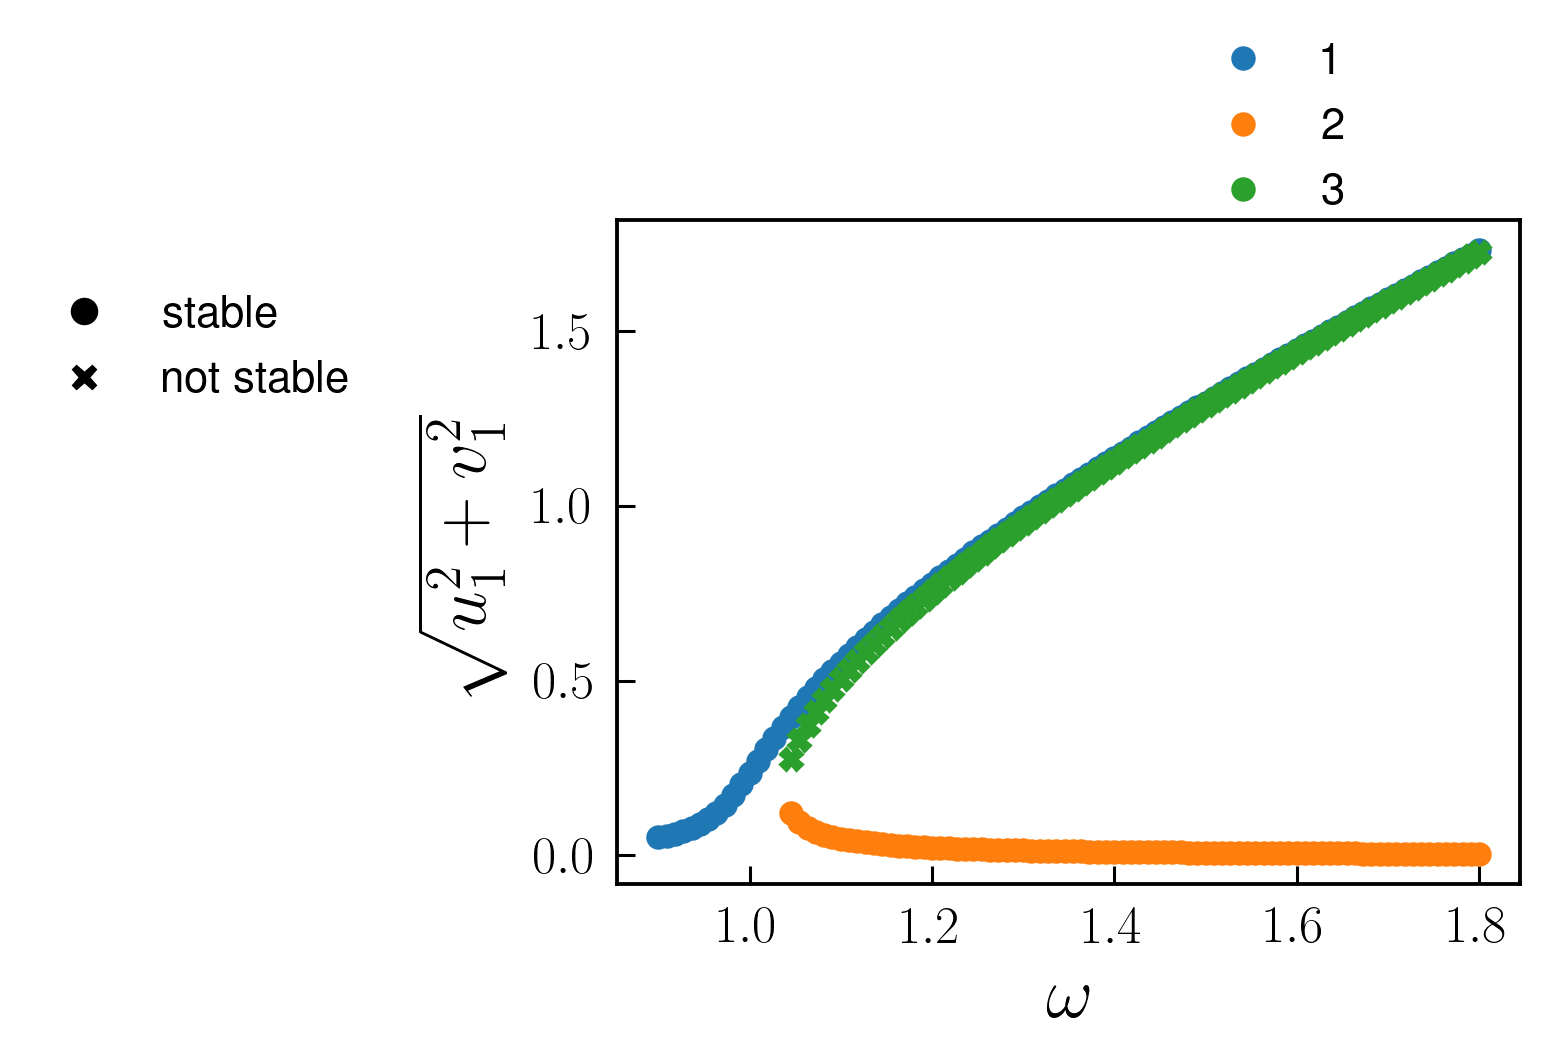

In [15]:
plot_1D_solutions(solutions, x="ω", y="sqrt(u1^2 + v1^2)");
#HarmonicBalance.savefig("DuffingPlot.pdf")